# Dataset Statistics

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import transformers
import numpy as np
import datasets

In [2]:
dataset_path = '../datasets/hotpot_qa'
dataset = datasets.load_from_disk(dataset_path)

bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
bart_tokenizer = transformers.BartTokenizer.from_pretrained('facebook/bart-base')

In [3]:
def get_statistics(mode, tokenizer):
    lengths = []
    for x in dataset['train']:
        lengths = statistics(x, lengths, mode, tokenizer)
    
    sorted_lengths, length_counts, percentiles, percentile_values = transform_lengths(lengths)
    print_statistics(sorted_lengths, length_counts, percentiles, percentile_values)
    plot_statistics(sorted_lengths, length_counts, percentiles)
    

In [4]:
def statistics(x, lengths, mode, tokenizer):
    if mode == 'supporting_facts':
        supporting_facts = ''
        for sent_id, title in zip(x['supporting_facts']['sent_id'], x['supporting_facts']['title']):
            paragraph_idx = x['context']['title'].index(title) if title in x['context']['title'] else -1
            if paragraph_idx != -1 and sent_id < len(x['context']['sentences'][paragraph_idx]):
                supporting_facts += (' ' if len(supporting_facts) > 0 else '') + x['context']['sentences'][paragraph_idx][sent_id].strip()
        lengths.append(len(tokenizer(text=supporting_facts)['input_ids']))
    elif mode == 'supporting_facts_sentences':
        lengths.append(len(x['supporting_facts']['sent_id']))
    elif mode == 'context':
        context = ''
        for paragraph in x['context']['sentences']:
            for sentence in paragraph:
                context += (' ' if len(context) > 0 else '') + sentence
        lengths.append(len(tokenizer(text=context)['input_ids']))
    elif mode == 'context_sentences':
        count = 0
        for paragraph in x['context']['sentences']:
            count += len(paragraph)
        lengths.append(count)
    elif mode == 'sentences':
        for paragraph in x['context']['sentences']:
            for sentence in paragraph:
                lengths.append(len(tokenizer(text=sentence)['input_ids']))
    elif mode == 'questions':
        lengths.append(len(tokenizer(text=x['question'])['input_ids']))
    elif mode == 'answers':
        lengths.append(len(tokenizer(text=x['answer'])['input_ids']))
    
    return lengths

In [5]:
def transform_lengths(lengths):
    sorted_lengths = sorted(lengths)
    length_counts = Counter(sorted_lengths)
    n = len(sorted_lengths)
    percentiles = [int(n * (i * 0.05)) for i in range(1, 20)]
    percentile_values = [(round((i + 1) * 0.05, 2), sorted_lengths[p]) for i, p in enumerate(percentiles)]
    return sorted_lengths, length_counts, percentiles, percentile_values

In [6]:
def print_statistics(sorted_lengths, length_counts, percentiles, percentile_values):
    print(f'mean: {np.mean(sorted_lengths)}')
    print(f'std: {np.std(sorted_lengths)}')
    print(f'max: {np.max(sorted_lengths)}')
    print(f'min: {np.min(sorted_lengths)}')
    print(f'percentiles: {percentiles}')
    print(f'percentile_values: {percentile_values}')

In [7]:
def plot_statistics(sorted_lengths, length_counts, percentiles):
    plt.xlim(np.min(sorted_lengths), sorted_lengths[int(len(sorted_lengths)*0.99)])
    plt.bar(length_counts.keys(), length_counts.values())
    for p in percentiles:
        plt.axvline(x=sorted_lengths[p], color='k')
    plt.show()

## Supporting facts

mean: 82.36027370334881
std: 33.74286967915141
max: 412
min: 9
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 41), (0.1, 47), (0.15, 51), (0.2, 55), (0.25, 59), (0.3, 62), (0.35, 65), (0.4, 69), (0.45, 72), (0.5, 76), (0.55, 80), (0.6, 84), (0.65, 88), (0.7, 93), (0.75, 99), (0.8, 106), (0.85, 114), (0.9, 127), (0.95, 146)]


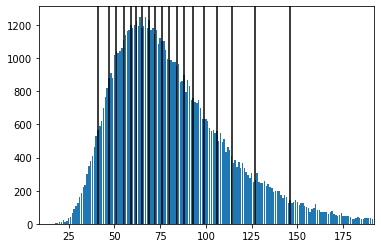

In [16]:
get_statistics(mode='supporting_facts', tokenizer=bart_tokenizer)

mean: 79.94151249355053
std: 32.22604885603262
max: 407
min: 7
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 40), (0.1, 46), (0.15, 50), (0.2, 54), (0.25, 57), (0.3, 60), (0.35, 64), (0.4, 67), (0.45, 70), (0.5, 74), (0.55, 77), (0.6, 81), (0.65, 86), (0.7, 91), (0.75, 96), (0.8, 103), (0.85, 111), (0.9, 122), (0.95, 140)]


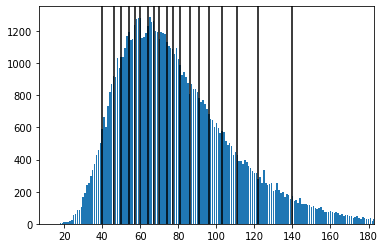

In [17]:
get_statistics(mode='supporting_facts', tokenizer=bert_tokenizer)

## Supporting facts sentences

mean: 2.3855064986118277
std: 0.6737306085807073
max: 12
min: 2
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 2), (0.1, 2), (0.15, 2), (0.2, 2), (0.25, 2), (0.3, 2), (0.35, 2), (0.4, 2), (0.45, 2), (0.5, 2), (0.55, 2), (0.6, 2), (0.65, 2), (0.7, 2), (0.75, 3), (0.8, 3), (0.85, 3), (0.9, 3), (0.95, 4)]


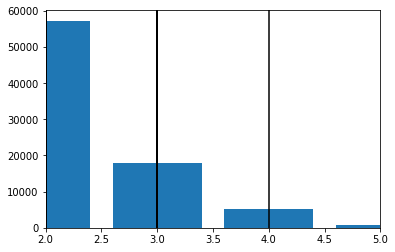

In [8]:
get_statistics(mode='supporting_facts_sentences', tokenizer=None)

## Context

Token indices sequence length is longer than the specified maximum sequence length for this model (1453 > 1024). Running this sequence through the model will result in indexing errors


mean: 1238.79224097688
std: 338.84343576869185
max: 3673
min: 49
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 750), (0.1, 853), (0.15, 919), (0.2, 973), (0.25, 1017), (0.3, 1058), (0.35, 1098), (0.4, 1137), (0.45, 1175), (0.5, 1212), (0.55, 1251), (0.6, 1291), (0.65, 1332), (0.7, 1378), (0.75, 1430), (0.8, 1489), (0.85, 1561), (0.9, 1659), (0.95, 1821)]


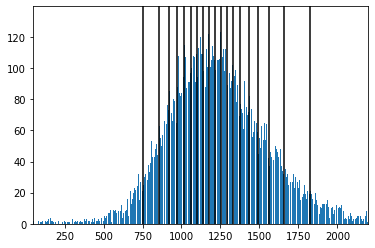

In [18]:
get_statistics(mode='context', tokenizer=bart_tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (1428 > 512). Running this sequence through the model will result in indexing errors


mean: 1184.162195032063
std: 324.7528825517489
max: 3495
min: 45
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 714), (0.1, 813), (0.15, 878), (0.2, 929), (0.25, 971), (0.3, 1012), (0.35, 1050), (0.4, 1087), (0.45, 1123), (0.5, 1160), (0.55, 1196), (0.6, 1235), (0.65, 1275), (0.7, 1318), (0.75, 1368), (0.8, 1425), (0.85, 1494), (0.9, 1587), (0.95, 1740)]


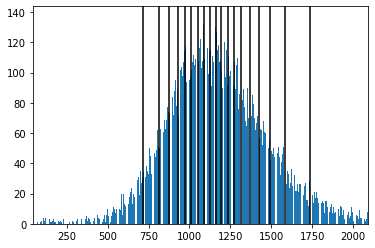

In [19]:
get_statistics(mode='context', tokenizer=bert_tokenizer)

## Context sentences

mean: 40.96664701112995
std: 11.232145058277895
max: 144
min: 2
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 25), (0.1, 29), (0.15, 31), (0.2, 32), (0.25, 34), (0.3, 35), (0.35, 36), (0.4, 37), (0.45, 39), (0.5, 40), (0.55, 41), (0.6, 42), (0.65, 44), (0.7, 45), (0.75, 47), (0.8, 49), (0.85, 51), (0.9, 55), (0.95, 60)]


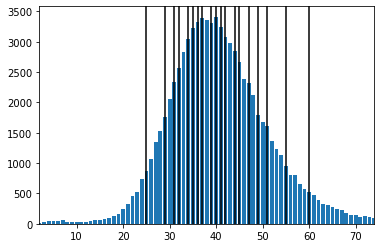

In [20]:
get_statistics(mode='context_sentences', tokenizer=bart_tokenizer)

mean: 40.96664701112995
std: 11.232145058277895
max: 144
min: 2
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 25), (0.1, 29), (0.15, 31), (0.2, 32), (0.25, 34), (0.3, 35), (0.35, 36), (0.4, 37), (0.45, 39), (0.5, 40), (0.55, 41), (0.6, 42), (0.65, 44), (0.7, 45), (0.75, 47), (0.8, 49), (0.85, 51), (0.9, 55), (0.95, 60)]


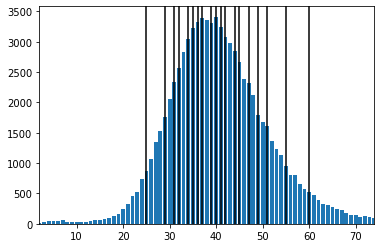

In [21]:
get_statistics(mode='context_sentences', tokenizer=bert_tokenizer)

## Sentences 

mean: 31.494580880763184
std: 16.378703718153734
max: 916
min: 2
percentiles: [166738, 333476, 500215, 666953, 833691, 1000430, 1167168, 1333906, 1500645, 1667383, 1834121, 2000860, 2167598, 2334336, 2501075, 2667813, 2834551, 3001290, 3168028]
percentile_values: [(0.05, 13), (0.1, 15), (0.15, 17), (0.2, 19), (0.25, 21), (0.3, 22), (0.35, 24), (0.4, 25), (0.45, 27), (0.5, 28), (0.55, 30), (0.6, 32), (0.65, 34), (0.7, 36), (0.75, 38), (0.8, 41), (0.85, 45), (0.9, 51), (0.95, 61)]


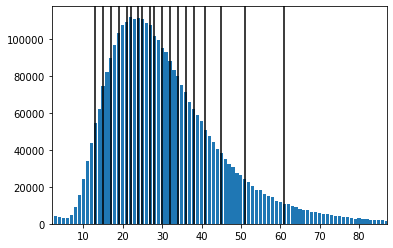

In [22]:
get_statistics(mode='sentences', tokenizer=bart_tokenizer)

mean: 30.85669883383157
std: 15.79598757615822
max: 951
min: 2
percentiles: [166738, 333476, 500215, 666953, 833691, 1000430, 1167168, 1333906, 1500645, 1667383, 1834121, 2000860, 2167598, 2334336, 2501075, 2667813, 2834551, 3001290, 3168028]
percentile_values: [(0.05, 13), (0.1, 15), (0.15, 17), (0.2, 19), (0.25, 20), (0.3, 22), (0.35, 23), (0.4, 25), (0.45, 26), (0.5, 28), (0.55, 29), (0.6, 31), (0.65, 33), (0.7, 35), (0.75, 38), (0.8, 41), (0.85, 44), (0.9, 50), (0.95, 59)]


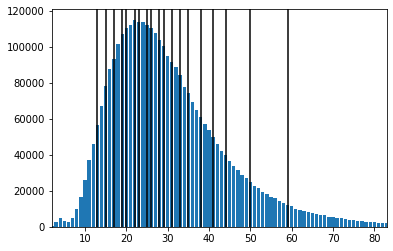

In [23]:
get_statistics(mode='sentences', tokenizer=bert_tokenizer)

## Questions

mean: 25.053966733004103
std: 12.520704419696212
max: 144
min: 6
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 14), (0.1, 15), (0.15, 16), (0.2, 17), (0.25, 18), (0.3, 18), (0.35, 19), (0.4, 20), (0.45, 21), (0.5, 22), (0.55, 23), (0.6, 24), (0.65, 25), (0.7, 26), (0.75, 28), (0.8, 30), (0.85, 33), (0.9, 38), (0.95, 50)]


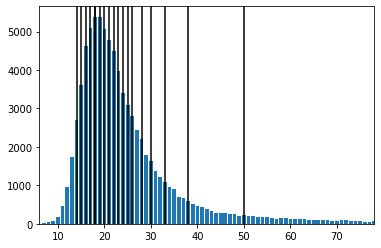

In [24]:
get_statistics(mode='questions', tokenizer=bart_tokenizer)

mean: 24.451045428859242
std: 12.22368334968938
max: 142
min: 6
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 13), (0.1, 15), (0.15, 16), (0.2, 16), (0.25, 17), (0.3, 18), (0.35, 19), (0.4, 19), (0.45, 20), (0.5, 21), (0.55, 22), (0.6, 23), (0.65, 24), (0.7, 26), (0.75, 27), (0.8, 29), (0.85, 32), (0.9, 37), (0.95, 49)]


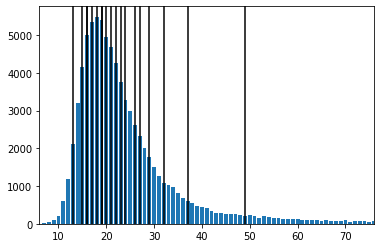

In [25]:
get_statistics(mode='questions', tokenizer=bert_tokenizer)

## Answers

mean: 5.564273605071128
std: 2.886960329432108
max: 173
min: 3
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 3), (0.1, 3), (0.15, 3), (0.2, 4), (0.25, 4), (0.3, 4), (0.35, 4), (0.4, 5), (0.45, 5), (0.5, 5), (0.55, 5), (0.6, 6), (0.65, 6), (0.7, 6), (0.75, 6), (0.8, 7), (0.85, 7), (0.9, 8), (0.95, 10)]


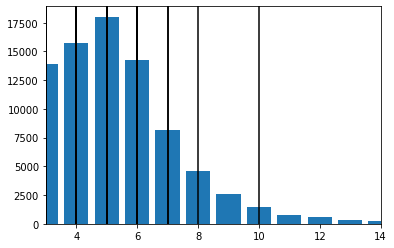

In [26]:
get_statistics(mode='answers', tokenizer=bart_tokenizer)

mean: 5.10530453797204
std: 2.7290556772566297
max: 171
min: 3
percentiles: [4070, 8140, 12210, 16280, 20350, 24420, 28490, 32560, 36630, 40701, 44771, 48841, 52911, 56981, 61051, 65121, 69191, 73261, 77331]
percentile_values: [(0.05, 3), (0.1, 3), (0.15, 3), (0.2, 3), (0.25, 3), (0.3, 4), (0.35, 4), (0.4, 4), (0.45, 4), (0.5, 5), (0.55, 5), (0.6, 5), (0.65, 5), (0.7, 6), (0.75, 6), (0.8, 6), (0.85, 7), (0.9, 7), (0.95, 9)]


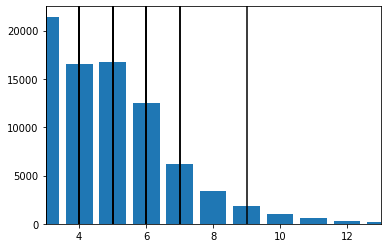

In [27]:
get_statistics(mode='answers', tokenizer=bert_tokenizer)